In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1ShwTiXLWOE-p3yZHYowmCc_-QYQue5m1


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import important libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [3]:
# read the input files and look at the top few lines #
data_path = "/content/gdrive/MyDrive/"
match_df = pd.read_csv(data_path+"matches.csv")
score_df = pd.read_csv(data_path+"deliveries.csv")
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary


In [4]:
# Let us get some basic stats #
print("Number of matches played so far : ", match_df.shape[0])
print("Number of seasons : ", len(match_df.season.unique()))

Number of matches played so far :  696
Number of seasons :  11


In [5]:
match_df.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018])

In [6]:
match_df.shape[1]

18

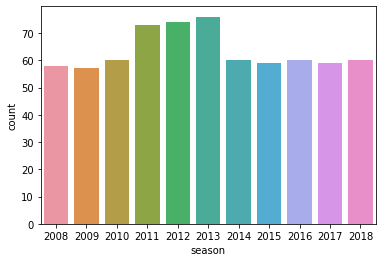

In [7]:
sns.countplot(x='season', data=match_df)
plt.show()

In [8]:
match_df['season'].nunique()

11

In [9]:
l = match_df['season'].value_counts()

In [10]:
print(dict(l))

{2013: 76, 2012: 74, 2011: 73, 2018: 60, 2016: 60, 2014: 60, 2010: 60, 2017: 59, 2015: 59, 2008: 58, 2009: 57}


In [11]:
wins = match_df['winner'].value_counts()

In [12]:
print(dict(wins))

{'Mumbai Indians': 98, 'Chennai Super Kings': 90, 'Kolkata Knight Riders': 86, 'Royal Challengers Bangalore': 79, 'Kings XI Punjab': 76, 'Rajasthan Royals': 70, 'Delhi Daredevils': 67, 'Sunrisers Hyderabad': 52, 'Deccan Chargers': 29, 'Gujarat Lions': 13, 'Pune Warriors': 12, 'Rising Pune Supergiant': 10, 'Kochi Tuskers Kerala': 6, 'Rising Pune Supergiants': 5}


In [13]:
print(wins)

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64


In [14]:
match_df.iloc[0]['season']

2017

In [15]:
def Calculate_Wins(str):
  wins = dict()
  rows = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
  for i in rows:
    wins[i] = 0
  for i in range(match_df.shape[0]):
    if(match_df.iloc[i]['season'] == 2008 and match_df.iloc[i]['winner'] == str):
      wins[2008] +=1
    if(match_df.iloc[i]['season'] == 2009 and match_df.iloc[i]['winner'] == str):
      wins[2009] +=1
    if(match_df.iloc[i]['season'] == 2010 and match_df.iloc[i]['winner'] == str):
      wins[2010] +=1
    if(match_df.iloc[i]['season'] == 2011 and match_df.iloc[i]['winner'] == str):
      wins[2011] +=1
    if(match_df.iloc[i]['season'] == 2012 and match_df.iloc[i]['winner'] == str):
      wins[2012] +=1
    if(match_df.iloc[i]['season'] == 2013 and match_df.iloc[i]['winner'] == str):
      wins[2013] +=1
    if(match_df.iloc[i]['season'] == 2014 and match_df.iloc[i]['winner'] == str):
      wins[2014] +=1
    if(match_df.iloc[i]['season'] == 2015 and match_df.iloc[i]['winner'] == str):
      wins[2015] +=1
    if(match_df.iloc[i]['season'] == 2016 and match_df.iloc[i]['winner'] == str):
      wins[2016] +=1
    if(match_df.iloc[i]['season'] == 2017 and match_df.iloc[i]['winner'] == str):
      wins[2017] +=1
    if(match_df.iloc[i]['season'] == 2018 and match_df.iloc[i]['winner'] == str):
      wins[2018] +=1
  return wins

In [16]:
KKR = Calculate_Wins("Kolkata Knight Riders")
print(KKR)

{2008: 6, 2009: 3, 2010: 7, 2011: 8, 2012: 12, 2013: 6, 2014: 11, 2015: 7, 2016: 8, 2017: 9, 2018: 9}


In [17]:
MI = Calculate_Wins("Mumbai Indians")
print(MI)

{2008: 7, 2009: 5, 2010: 11, 2011: 10, 2012: 10, 2013: 13, 2014: 7, 2015: 10, 2016: 7, 2017: 12, 2018: 6}


In [18]:
CSK = Calculate_Wins("Chennai Super Kings")
print(CSK)

{2008: 9, 2009: 8, 2010: 9, 2011: 11, 2012: 10, 2013: 12, 2014: 10, 2015: 10, 2016: 0, 2017: 0, 2018: 11}


In [19]:
RCB = Calculate_Wins("Royal Challengers Bangalore")
print(RCB)

{2008: 4, 2009: 9, 2010: 8, 2011: 10, 2012: 8, 2013: 9, 2014: 5, 2015: 8, 2016: 9, 2017: 3, 2018: 6}


In [20]:
KXIP = Calculate_Wins("Kings XI Punjab")
print(KXIP)

{2008: 10, 2009: 7, 2010: 4, 2011: 7, 2012: 8, 2013: 8, 2014: 12, 2015: 3, 2016: 4, 2017: 7, 2018: 6}


In [21]:
RR = Calculate_Wins("Rajasthan Royals")
print(RR)

{2008: 13, 2009: 6, 2010: 6, 2011: 6, 2012: 7, 2013: 11, 2014: 7, 2015: 7, 2016: 0, 2017: 0, 2018: 7}


In [23]:
DC = Calculate_Wins("Delhi Daredevils")
print(DC)

{2008: 7, 2009: 10, 2010: 7, 2011: 4, 2012: 11, 2013: 3, 2014: 2, 2015: 5, 2016: 7, 2017: 6, 2018: 5}


In [24]:
SRH = Calculate_Wins("Sunrisers Hyderabad")
print(SRH)

{2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 10, 2014: 6, 2015: 7, 2016: 11, 2017: 8, 2018: 10}


In [36]:
team_wins = pd.DataFrame({'Mumbai Indians':MI})
team_wins['Chennai Super Kings'] = CSK.values()
team_wins['Kolkata Knight Riders'] = KKR.values()
team_wins['Royal Challengers Bangalore'] = RCB.values()
team_wins['Kings XI Punjab'] = KXIP.values()
team_wins['Rajasthan Royals'] = RR.values()
team_wins['Delhi Capitals'] = DC.values()
team_wins['Sunrisers Hyderabad'] = SRH.values()

In [37]:
team_wins

,Mumbai Indians,Chennai Super Kings,Kolkata Knight Riders,Royal Challengers Bangalore,Kings XI Punjab,Rajasthan Royals,Delhi Capitals,Sunrisers Hyderabad
2008,7,9,6,4,10,13,7,0
2009,5,8,3,9,7,6,10,0
2010,11,9,7,8,4,6,7,0
2011,10,11,8,10,7,6,4,0
2012,10,10,12,8,8,7,11,0
2013,13,12,6,9,8,11,3,10
2014,7,10,11,5,12,7,2,6
2015,10,10,7,8,3,7,5,7
2016,7,0,8,9,4,0,7,11
2017,12,0,9,3,7,0,6,8


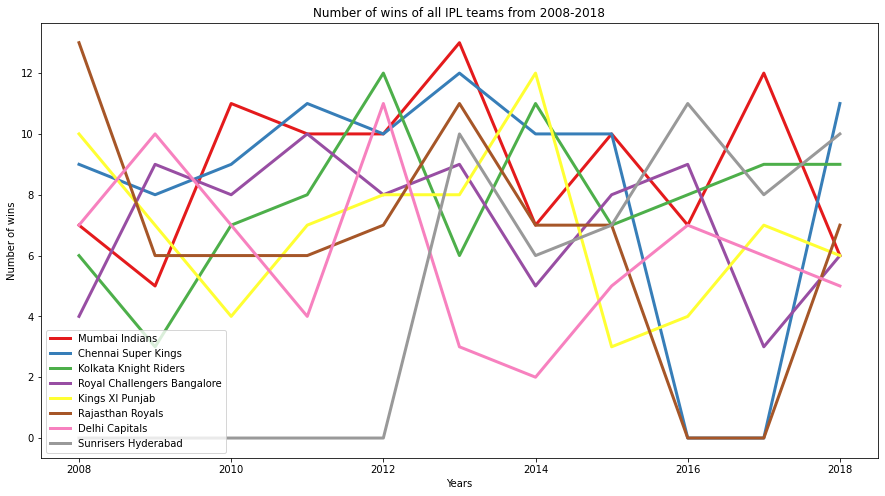

In [46]:
team_wins.plot(colormap='Set1', figsize=(15,8), lw=3);
plt.xlabel('Years')
plt.ylabel('Number of wins')
plt.title('Number of wins of all IPL teams from 2008-2018')
plt.show()

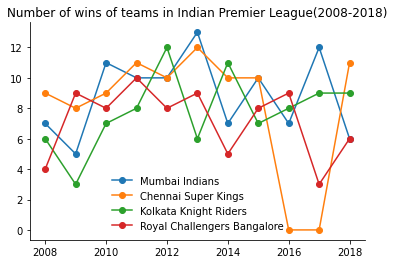

In [51]:
x = team_wins.index.tolist()
y1 = team_wins['Mumbai Indians'].tolist()
y2 = team_wins['Chennai Super Kings'].tolist()
y3 = team_wins['Kolkata Knight Riders'].tolist()
y4 = team_wins['Royal Challengers Bangalore'].tolist()
y5 = team_wins['Kings XI Punjab'].tolist()
y6 = team_wins['Rajasthan Royals'].tolist()
y7 = team_wins['Delhi Capitals'].tolist()
y8 = team_wins['Sunrisers Hyderabad'].tolist()



plt.plot(x, y1, '-o', label = "Mumbai Indians")
plt.plot(x, y2, '-o', label = "Chennai Super Kings")
plt.plot(x, y3, '-o', label = "Kolkata Knight Riders")
plt.plot(x, y4, '-o', label = "Royal Challengers Bangalore")

plt.title('Number of wins of teams in Indian Premier League(2008-2018)')
 
plt.legend(frameon=False)
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]

plt.show()